---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    

<br><br>
<h1 align="center">Lec-06: A Walkthrough of the Hugging Face Hub</h1>

# Learning agenda of this notebook
1. A Quick Overview of Open-Source AI Models
    - Limitations of Closed Source Flagship models
    - What is an Open Source Model?
    - Features of Some Famous Open Source Models
2. Overview of HuggingFace (A global AI community Platform)
    -  Creating an Account on Hugging Face Hub
    -  What is there on Hugging Face Hub?
    -  Creating an Account on Hugging Face
    -  Creating HuggingFace Secret Key
3. **Hugging Face Developer Ecosystem and Libraries**
    - Transformers
    - PEFT
    - TRL
    - Accelerate
4. **HuggingFace Models**
    - Model Types (By Architecture)
        - Decoder-Only (Autoregressive Transformer)
        - Encoder-Only (Representation Transformer)
        - Encoder-Decoder (Seq2Seq Transformer)
    - Model Types (By Training stage)
        - Base / Foundation / Pre-trained Models
        - Fine-tuned Models (Task-specific Models)
        - Instruction-tuned / Chat / Instruction-following Models
        - Parameter-efficient / Adapter / PEFT / Partial-tuning Variants
        - Quantized / Distilled / Optimized Models (Compressed Models)
    -  Model Types (By Function)
        -  Preprocessing (Tokenizers)
        -  Representation (Embedding Models)
        -  Generation / Reasoning (LLMs)
        -  Specialized NLP
        -  Non-Text AI Models
        -  Multimodal Models (Vision + Text + Audio)
    - Ways to Access Open Source LLMs
        - Access Open-Source Models via Cloud-Based Providers
        - Run Open-Source Models locally using runtimes
        - Use Open-Source Models via Hugging Face `pipeline()` API
        - Load and run models directly from Hugging Face Hub using `AutoModel`/`AutoTokenizer`
        - Fine-Tune LLMs using full fine-tuning or PEFT methods
        - Build and train an AI Model from scratch using PyTorch / TensorFlow
5. **HuggingFace Datasets**
6. **HuggingFace Spaces** 

# <span style='background :lightgreen' >1. A Quick Overview of Open-Source AI Models</span>
## a. Limitations of Closed-Source Flagship models
- **Cost and Pricing Issues:**
    - High API costs: For example, Claude 4 pricing is around `$15` per million input tokens and `$75` per million output tokens.
    - Unpredictable pricing changes: Providers have historically raised prices after model improvements.
    - Usage caps and rate limits: For instance, Claude restricts users to roughly 45 messages every five hours, depending on request size.
- **Data Privacy and Security:**
    - Data exposure risks: Proprietary or sensitive data must pass through vendor infrastructure.
    - Compliance challenges: Harder to guarantee adherence to strict regulations (e.g., EU General Data Protection Regulation (GDPR), US Health Insurance Portability and Accountability Act (HIPAA)).
    - Regional restrictions: Some models are unavailable in certain countries due to policy or infrastructure limitations.
- **Performance Limitations:**
    - Generic pretraining: Models are trained for broad use, not tailored to enterprise-specific tasks.
    - Context window limits: Even with large context sizes, fixed windows may be insufficient for some workflows.
    - Latency and availability: API performance depends on network reliability and provider uptime.
- **Vendor Lock-in and Control:**
    - No model ownership: You rely entirely on third-party providers for availability and updates.
    - Unilateral policy changes: Terms of service, usage limits, or features can change without notice.
    - Forced model transitions: Example — GPT-4 will be retired from ChatGPT and replaced by GPT-4o as of April 30, 2025.
    - Limited customization: Fine-tuning or deeper control over model weights is generally unavailable.

## b. What is an Open Source Model?
- An open-source large language model (LLM) meets the following criteria:
    - **Freely available model weights, training data and code (** *`Can I download it?`* **):**  The model’s architecture, source code, and weights can be downloaded and used without restrictions.
    - **Permissive license (** *`Can I use it in my business?`* **):** The license allows both commercial use and modification.
    - **Redistribution rights (** *`Can I modify and share my improved version freely?`* **):** Users can modify, fine-tune, and share their versions of the model without needing prior approval or facing usage limits.

✅ If the answer to all three questions is YES, the model qualifies as open source.

❌ If the answer to any one is NO, the model is not truly open source.


## c. Features of Some  Famous Open Source Models
| Model Family (Variants)                                                           | Best For                                     | Key Features                                                                                                                     | Access Points                                                                                                                                                                      |
| --------------------------------------------------------------------------------- | -------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **LLaMA (Meta)**<br>• Llama 3.2 (1B–90B)<br>• Llama 4 Scout / Maverick / Behemoth | General-purpose tasks, reasoning, multimodal | • Efficient transformer design<br>• Multimodal support in Llama 4<br>• **Context window: up to 128K tokens** (Llama 4 Scout)                            | • HuggingFace: [https://huggingface.co/meta-llama](https://huggingface.co/meta-llama)<br>• Meta Dev: [https://www.llama.com](https://www.llama.com)                                |
| **Mixtral (Mistral AI)**<br>• Mixtral-8x7B<br>• Mixtral-8x22B                     | High performance with low compute cost       | • Sparse MoE architecture<br>• Strong reasoning + coding abilities<br>• **Context window: up to 128K tokens**                                           | • Mistral Console: [https://console.mistral.ai](https://console.mistral.ai)<br>• HuggingFace: [https://huggingface.co/mistralai](https://huggingface.co/mistralai)                 |
| **Gemma (Google DeepMind)**<br>• Gemma-2B<br>• Gemma-7B<br>• Gemma-Instruct       | Lightweight models for edge + server         | • Gemini-derived architecture<br>• Responsible AI focus<br>• **Context window: 8K tokens** (official)                                                   | • HuggingFace: [https://huggingface.co/google/gemma-7b](https://huggingface.co/google/gemma-7b)<br>• Google AI Studio: [https://aistudio.google.com](https://aistudio.google.com)  |
| **Phi (Microsoft)**<br>• Phi-2<br>• Phi-3 Mini / Small / Medium                   | Small but strong reasoning models            | • High-quality training corpus<br>• Optimized for on-device & low-compute<br>• **Context window: up to 128K tokens** (Phi-3)                            | • HuggingFace: [https://huggingface.co/microsoft](https://huggingface.co/microsoft)                                                                                                |
| **DeepSeek (DeepSeek)**<br>• DeepSeek-V3-Base / V3-Chat<br>• DeepSeek-Code / Lite            | Coding, long-context reasoning, research     | • Mixture-of-Experts (MoE)<br>• Strong multilingual + long-document handling<br>• **Context window: up to 128K tokens** | • HuggingFace: [https://huggingface.co/deepseek-ai/DeepSeek-V3](https://huggingface.co/deepseek-ai/DeepSeek-V3)<br>• Website: [https://www.deepseek.com](https://www.deepseek.com) |
| **Qwen (Alibaba)**<br>• Qwen-2 (7B–72B)<br>• Qwen-VL<br>• Qwen-Audio              | Multilingual, multimodal, enterprise use     | • Vision + audio variants<br>• Strong bilingual (English/Chinese) support<br>• **Context window: up to 128K tokens** (Qwen-2)                           | • HuggingFace: [https://huggingface.co/Qwen](https://huggingface.co/Qwen)<br>• ModelScope: [https://modelscope.cn](https://modelscope.cn)                                          |


# <span style='background :lightgreen' >2. Overview of HuggingFace (A global AI community Platform)</span>

<h3 align="center"><div class="alert alert-success" color=magenta style="margin: 20px">HuggingFace is an AI community platform and open-source hub for <b>models</b>, <b>datasets</b>, and LLM-powered <b>applications</b> where collaborators can contribute through Git-based repositories.</h3>
    
<h3 align="center"><div class="alert alert-success" style="margin: 20px">HuggingFace enables developers to download and run models locally, interact with them via CLI or APIs,  and deploy interactive LLM-powered apps using Hugging Face Spaces.</h3>

<h3 align="center"><div class="alert alert-success" style="margin: 20px">Whenever, companies like Google, Meta, DeepSeek, Ali Baba want to release a new AI model, HF is where they publish them first</h3>


- Helpful links:
    - **Website:** [https://huggingface.co](https://huggingface.co)
    - **Documentation:** [https://huggingface.co/docs](https://huggingface.co/docs)
    - **GitHub:** [https://github.com/huggingface](https://github.com/huggingface)

###  What is there on Hugging Face Hub?
- As of **January 2026**, Hugging Face hosts:
    - **22,63,000+ public models**
    - **5,79,000+ datasets**
    - **Hundreds of thousands of Spaces** (where you can upload an app and run it run on hugging face cloud hardware and make it available for otherpeople to use)
    - Many popular **open-source libraries**  like `transformers`, `peft`, `trl`, `accelerate`   and the list goes on.
- Everything on the Hub (models, datasets, Spaces, even documentation) is stored as a **Git repository**, enabling: Cloning, Forking, Pull requests, Full version history, Collaboration with teams and contributors

###  Creating an Account on Hugging Face
- Visit **[huggingface.co](https://huggingface.co)** and click **Sign Up** (or **Log In** if you already have an account). You can register using an email address, GitHub, or Google account.
- A free account allows you to:
    - Access millions of **public models**, **datasets**, and **Spaces**
    - Upload your own models or datasets
    - Deploy interactive applications
    - Use community features (likes, forks, discussions)
    - Once logged in, you get your own **public profile page**, like mine: [https://huggingface.co/arif-butt](https://huggingface.co/arif-butt)

###  Creating HuggingFace Secret Key
- Login to your HuggingFace account
- Click your ovatar at the top right
- Click Settings in the left pane where your profile appears
- Click Access Tokens
- Click Create Now Token button at the top right
- Save the token to your .env file

# <span style='background :lightgreen' >3. Hugging Face Developer Ecosystem and Libraries</span>

<h3 align="center"><div class="alert alert-success" color=magenta style="margin: 20px">The Hugging Face ecosystem consists of multiple libraries that work together to make training, fine-tuning, and deploying AI models easier.</h3>

<h3 align="center"><div class="alert alert-success" color=magenta style="margin: 20px">At the center is Transformers, with companion libraries (PEFT, TRL, Accelerate) that extend its capabilities for specialized tasks.</h3>


## Core Library: Transformers 
- Hugging Face Transformers is a library that provides tools for loading, training, fine-tuning, and using open-source AI models (text, vision, audio, and multimodal) through a unified API that works seamlessly with PyTorch, TensorFlow, and JAX.
- Installation: `uv add transformers`
#### Components that are part of transformers package
- **Model Hub Integration (built into Transformers):** The Hugging Face Model Hub is an online platform hosting millions of models, datasets, and spaces. It enables easy downloading, uploading, versioning, sharing, and discovering of models. Transformers integrates tightly with the Model Hub, allowing you to load any model with a single line of code using its repository name.
- **Pipeline:** The simplest way to use models. It's a high-level abstraction that wraps the entire ML workflow (tokenization, model inference, and decoding) into a single call, allowing developers to perform tasks like classification, translation, summarization, and question answering with minimal code.
- **Models:** Neural network architectures that perform the actual computations. The Transformers library provides standardized implementations of modern text, vision, audio, and multimodal models, and includes `AutoModel` classes that automatically load the correct architecture for a chosen task.
- **Tokenizers:** Handle conversion between raw text and numerical tokens that models can process. They split text into subword tokens, map them to integer IDs, and decode model outputs back to readable text. The library provides fast, optimized tokenizers (via `AutoTokenizer` class) to ensure efficient preprocessing.
- **Config:** A Config object defines a model's architecture settings, such as number of layers, hidden sizes, attention heads, dropout, and vocabulary size. Every model has a corresponding configuration file that ensures the correct architecture is instantiated, making it easy to load, modify, or share model setups consistently across frameworks.
- **Feature Extractor:** Used primarily for non-text modalities (vision and audio). A feature extractor converts raw data (images, audio waveforms) into normalized numeric tensors that models can understand. It handles resizing, cropping, normalization, padding, and other domain-specific preprocessing steps.
- **Processor:** Processors combine multiple preprocessing components (such as tokenizers + feature extractors) into a single unified interface. They are used especially for multimodal models (e.g., vision+text, audio+text) and ensure that all necessary inputs are formatted correctly before being fed into the model.
- **Trainer:** The Trainer API provides a complete, high-level training loop for fine-tuning transformer models using datasets, optimizers and evaluation loops. It manages batching, tokenization, optimization, mixed precision, metrics, evaluation, logging, and checkpointing—allowing users to fine-tune large models with minimal boilerplate code.
## Companion Libraries
- These are separate libraries that integrate seamlessly with Transformers but require independent installation. They extend the ecosystem with specialized capabilities for efficient training and fine-tuning.
#### PEFT (Parameter-Efficient Fine-Tuning)
- The **PEFT** library provides lightweight fine-tuning methods that enable training large models by updating only a small number of additional parameters rather than all model weights. This makes fine-tuning practical even on limited hardware with reduced memory and computational costs.
- **Key Methods:**
    - LoRA (Low-Rank Adaptation): Adds trainable low-rank matrices to model layers
    - QLoRA: Quantized LoRA for even more memory efficiency
    - Prefix Tuning: Learns soft prompts prepended to model inputs
    - Adapter Modules: Small bottleneck layers inserted into the model
- Installation: ` uv add peft`
#### TRL (Transformer Reinforcement Learning)
- The **TRL** library is built on top of Transformers (and uses Accelerate under the hood) and is designed for post-training and reinforcement learning-based fine-tuning of language models. It enables advanced training methods that go beyond standard supervised learning to align models with desired behaviors and human preferences.
- Key Methods:
    - SFT (Supervised Fine-Tuning): Standard instruction fine-tuning
    - Reward Modeling: Training models to predict human preferences
    - DPO (Direct Preference Optimization): Aligning models to preferences without explicit reward models
    - GRPO (Group Relative Policy Optimization): Advanced RL-based alignment
    - PPO (Proximal Policy Optimization): Classic RL fine-tuning approach
- **Installation:** ` uv add trl`
#### Accelerate
- The **Accelerate** library is the foundational library for distributed and optimized training in the Hugging Face ecosystem. It provides a unified interface for scaling training from single devices to large distributed systems without changing your code.
- **Key Capabilities:**
    - Multi-GPU Training: Seamlessly scale from 1 to multiple GPUs
    - Multi-Node Clusters: Distribute training across multiple machines
    - TPU Support: Run training on Google's TPU hardware
    - Mixed Precision: FP16, BF16, and FP8 training for faster computation
    - Distributed Backends: Supports FSDP, DeepSpeed, and other frameworks
    - Flexible Integration: Works with both high-level Trainer API and custom PyTorch training loops
- **Installation:** ` uv add accelerate` 

# <span style='background :lightgreen' >4. Exploring Hugging Face Models</span>
- Choosing the right Large Language Model (LLM) for your project is crucial for success. The right selection can save significant time, money, and computational resources while ensuring optimal performance for your specific use case. Let me walk you through the key factors to consider when selecting an LLM from platforms like Hugging Face.
- Click the **Models** tab from the top navigation bar — this opens the world’s largest catalog of pre-trained AI models across multiple modalities:
  - *Text:* Large Language Models (LLMs), embedding models, text classifiers, question-answering models, translation models, etc. (These models process and generate natural language.)
  - *Vision:* Image classification, object detection, segmentation, OCR models. (These models interpret images and visual patterns.)
  - *Audio:* Automatic speech recognition (ASR), text-to-speech (TTS), audio classification. (These models convert speech ↔ text or interpret sounds.)
  - *Multimodal:* Models that combine text + images + audio (e.g., image-to-text captioning, video understanding). (These models handle multiple input types simultaneously.)
- To search for models of your choice, you can filter them using criteria such as:
  - *Tasks:* (e.g., summarization, OCR, translation)
  - *Parameter Count:* (e.g., 7B, 70B — rough measure of capacity)
  - *Libraries:* used (e.g., transformers, diffusers)
  - *Apps:* (Spaces that use the model)
  - *Inference providers:* Filter models and display only those with inference enabled via Inference Providers (e.g., Groq, Together AI, Replicate, Cohere,  Inference API)
  - *License:* (open, commercial, research-only)
  - *Modality:* (text, vision, audio, etc.)
- Sort options:
  - *Trending*: Shows currently popular and recently updated models
  - *Most Likes*
  - *Most Downloads*
  - *Recently Updated* 
- Once you select a model, you go to the **Model Card**, that describes the organization or individual who created the model. On the model card you see:
  - Documentation explaining what the model does, how it was trained, limitations, and intended use
  - Supported tasks, which problems the model can solve
  - License & usage terms, legal guidelines on how the model can be used
  - Training details, dataset, architecture, training parameters (abstract overview)
  - Inference examples, ready-to-use Python, JavaScript, and API snippets
  - Downloadable weights, in formats like PyTorch, TensorFlow, ONNX, GGUF, etc.
- A model can be used for:
  - *Inference:*  Using a trained model to make predictions (generation, embeddings, classification, summarization)
  - *Fine-tuning:*  Adapting a pre-trained model to a new dataset using techniques like PEFT, LoRA, SFT *(You train only a small number of additional parameters.)* 
  - *Quantization:*  Compressing a model (4-bit/8-bit, GGUF) to run on smaller hardware with minimal quality loss

>- You can create your own model repositories just like mine:
  **[https://huggingface.co/arif-butt](https://huggingface.co/arif-butt)**

# a. Model Types (By Architecture)
- A model’s architecture defines how information flows inside it — what components it uses, and how the layers are connected. The most widely used architectures in modern LLMs are based on the Transformer framework, but with structural differences that make them suitable for different tasks and performance trade-offs.
### (i) Decoder-Only (Autoregressive Transformer)
- This architecture uses only the decoder part of the standard Transformer block.
- It applies masked (causal) self-attention, which prevents the model from seeing future tokens while generating text.
- This design makes it ideal for text generation (next-token prediction), creative writing, dialogue, and code generation.
- **Examples:**
    - OpenAI: GPT-2, GPT-3, GPT-4 (conceptually decoder-only)
    - Meta: LLaMA, LLaMA-2, LLaMA-3, LLaMA-3.1
    - Mistral AI: Mistral-7B, Mixtral-8x7B (MoE variant)
    - Google: Gemma, Gemma-2
    - Alibaba: Qwen, Qwen2, Qwen2.5
    - BigCode: StarCoder, StarCoder2
    - DeepSeek: DeepSeek-LLM, DeepSeek-Coder
### (ii) Encoder-Only (Representation Transformer)
- This architecture uses only the encoder stack of a Transformer.
- It employs bidirectional attention, allowing the model to consider context from both left and right of each token.
- Best suited for understanding tasks, such as classification, retrieval, or embedding extraction.
- **Examples:**
    - Google: BERT, RoBERTa, ALBERT (Bidirectional Encoder Representations from Transformer)
    - Facebook/Meta: XLM-RoBERTa
    - Microsoft: DeBERTa, DeBERTa-v3
    - Sentence-Transformers: all-MiniLM-L6-v2, all-mpnet-base-v2, paraphrase-multilingual-MiniLM-L12-v2
    - OpenAI (legacy embeddings): text-embedding-ada-002
### (iii) Encoder-Decoder (Seq2Seq Transformer)
- Combines both an encoder and a decoder.
- Encoder first processes the input, then the decoder generates output conditioned on that representation.
- Ideal for sequence-to-sequence tasks, such as translation, summarization, text generation and paraphrasing.
- **Examples:**
    - Google: Text-To-Text Transfer Transformer (T5)
    - Meta/Facebook: Bidirectional and Auto-Regressive Transformers (BART)
    - Google/Research: FLAN-T5
### (iv) Specialized Variants
- **Dense Transformer Layers:** Standard transformer blocks use dense feed forward network, where all parameters are active on every input. Every token processes through the full network and self-attention layers. Most classic transformer models (e.g., GPT, BERT, T5) use dense layers. 
- **Sparse Mixture of Experts (MoE):** Instead of activating all parameters, the model contains many “experts” (parallel subnetworks), but only a few experts are used per token. A gating mechanism (router) dynamically selects which experts process a given input. This allows models to have very large parameter counts while keeping inference cost low. Some common models that use MoE are Mixtral-8x7B, Mixtral-8x22B. DeepSeek-v3 has around 671B parameters, around 256 routed experts with 8 activated per token. Only 37B active parameters per token making the inference efficient.

# b. Model Types (By Training)
### (i) Base / Foundation / Pre-trained Models
- These models are trained only on next-token prediction (pre-trained on large text corpora using unsupervised/self-supervised learning), with no instruction fine-tuning or alignment.
- They capture general language understanding - grammar, syntax, semantics, general world knowledge, and excel in masked-token prediction or next-token continuation.
- They are not specialized for downstream tasks (classification, summarization, dialogue) and often require clever prompting or further tuning.
- Examples: `google/gemma-3-1b-pt`, `google/gemma-2-2b`, `meta-llama/Llama-3.1-8B`,  `microsoft/deberta-v3-base`, `mistralai/Mistral-7B-v0.1`, `bert-base-uncased`, `gpt2`, `roberta-base`
### (ii) Fine-tuned Models (Task-specific Models)
- These models start from a base model and are fine-tuned on labeled, task-specific datasets using supervised fine-tuning (SFT).
- These models are ready-to-use for specific downstream tasks like text classification, text summarization, machine translation, QA and Named Entity Recognition
- Examples: `facebook/bart-large-cnn` (for summarization, `distilbert-base-uncased-finetuned-sst-2-english` (for sentiment classification), `google/mt5-small-finetuned-wikisplit` (for translation/splitting), `deepset/roberta-base-squad2` (for question answering)
### (iii) Instruction-tuned / Chat / Instruction-following Models
- These models start from a base model and undergo:
    - Instruction Supervised instruction fine-tuning (SFT) – trained on instruction → response pairs.
    - Optional Reinforcement Learning with Human Feedback (RLHF) – Improves alignment, safety and human preference following.
- The result is a model optimized for dialogue, reasoning, multi-turn conversation and natural instruction following.
- Examples: `meta-llama/Llama-3.1-8B-Instruct`, `meta-llama/Llama-3.3-70B-Instruct`,  `google/gemma-3-4b-it`, `microsoft/Phi-3-mini-4k-instruct`, `mistralai/Mistral-7B-Instruct-v0.2`, `unsloth/Llama-3.3-70b-Instruct`, `unsloth/Qwen2.5-7B-Instruct`, 
### (iv) Parameter-efficient / Adapter / PEFT / Partial-tuning Variants
- These models use Parameter Efficient Fine-Tuning (PEFT) where only a small subset of model parameters (or additional adapter weights) are trained, while the main base model weights remain frozen.
- Some commonly used PEFT techniques are Low-Rank Adaptation (LoRA), Quantized Low-Rank Adaptation (QLoRA),  Adapter, Prefix-Tuning.
- This reduces compute and memory requirements compared to full fine-tuning, making it feasible to adapt large models even on modest hardware.
- Such versions are useful when you want to specialize a base or instruct-tuned model for a niche domain or custom behavior without retraining everything from scratch
— Use cases: domain-specific classification, custom instruction-following
- Examples: `arif-butt/llmshield-1b-finetuned`, `Shlok307/gemma-3-1b-it-cyber-lora`, `Mithun-999/phi2-kali-linux-finetuned`, `arunimas1107/gpt-oss-medical`, `dsuram/distilbert-mentalhealth-classifier`, `dsuram/mistral-medical-finetuned`
### (v) Quantized / Distilled / Optimized Models (Compressed Models)
- AI models can be compressed to yield smaller, faster, more resource-efficient variants while attempting to maintain most of the original model’s performance. Compression techniques can be:
    - **Distillation:** A smaller “student” model mimicking a larger teacher (BERT → DistilBERT)
    - **Quantization:** Reducing precision of weights/activations (e.g. FP32 → INT8 or even lower), which drastically reduces memory usage and speeds up inference — often with small or acceptable drop in accuracy. Same model consuming less memory and giving faster inference
- GPT-Generated  Unified Format (GGUF) is a single binary file format containing model weights,  tokenizer and architecture info, designed for fast, local inference on consumer h/w
- These models are especially valuable when deploying and running on consumer  hardware (CPU, small GPU, edge devices), or when one needs faster inference / lower latency / lower RAM usage.
- Examples: `unsloth/Llama-3.1-8b-bnb-4bit`, `unsloth/gemma-2-9b-it-gguf`, `unsloth/gemma-3-12b-it-GGUF`, `distilbert-base-uncased`, `distilgpt2`

# c. Model Types (By Task/Function)
### (i) Preprocessing (Tokenizers)
* Tokenizers handle how raw text is converted into numeric tokens that neural networks can process, and how model outputs are turned back into text.
* They define the model vocabulary, segmentation rules, and mapping between text and token IDs.
* They are essential for every LLM, but are not neural models themselves.
- Examples: `GPT2Tokenizer` (BPE), `BertTokenizer` (WordPiece),  `google/gemma-2-tokenizer` (SentencePiece), `meta-llama/Llama-3-tokenizer` (SentencePiece)
### (ii) Representation (Embedding Models)
* Embedding models create dense vector representations that capture semantic meaning.
* They are optimized for similarity, clustering, semantic search, retrieval, and RAG (Retrieval Augmented Generation).
* They output vectors instead of generating text.
* Examples: `sentence-transformers/all-MiniLM-L6-v2`, `sentence-transformers/all-mpnet-base-v2`, `sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2`
### (iii) Generation / Reasoning (LLMs)
* LLMs can understand and generate human-like text.
* They can perform reasoning, question answering, dialogue, summarization, translation, code generation, etc.
* Many modern LLMs also undergo instruction tuning to behave like assistants.
* Examples: `meta-llama/Llama-3.1-8B-Instruct`, `google/gemma-2-9b-it`, `mistralai/Mistral-7B-Instruct-v0.2`, `Qwen/Qwen2.5-7B-Instruct`
### (iv) Specialized NLP 
- **Classification:**
    - These models take text (or other inputs) and output a label or category.
    - Common tasks: sentiment analysis, spam detection, topic labeling, toxicity detection.
    - They are usually fine-tuned versions of base models.
    - Examples: `distilbert-base-uncased-finetuned-sst-2-english` (sentiment), `unitary/toxic-bert` (toxicity classification), `joeddav/xlm-roberta-large-xnli` (entailment / classification)
- **Sequence-to-Sequence (Seq2Seq) Models:**
    - These models take a sequence and transform it into another sequence.
    - Common tasks: translation, summarization, paraphrasing, data-to-text.
    - Examples: `facebook/bart-large-cnn` (summarization), `google/mt5-small` (translation), `t5-base` (general text-to-text)
- **Question Answering (QA) Models:**
    - Specialized models that extract or generate answers to questions from text.
    - Used in chatbots, search engines, knowledge systems.
    - Examples: `deepset/roberta-base-squad2`, `distilbert-base-cased-distilled-squad`
- **Named Entity Recognition (NER):**
    - Identify and label spans in text (names, places, organizations, etc.)
    - Important for information extraction.
    - Examples: `dbmdz/bert-large-cased-finetuned-conll03-english`, `dslim/bert-base-NER`
### (v) Non-Text AI Models
- **Vision Models:**
    - Accept images and perform tasks like classification, segmentation, object detection.
    - Examples: `google/vit-base-patch16-224` (image classification), `facebook/detectron2` (object detection)
- **Diffusion Models:**
    - Primarily used for generating images, audio, or video.
    - Produce output by iteratively denoising random noise.
    - Examples: `runwayml/stable-diffusion-v1-5`, `stabilityai/sdxl-base`
- **Audio / Speech Models:**
    - Work on audio signals: speech recognition, audio classification, TTS.
    - Examples: `facebook/wav2vec2-base-960h` (ASR – speech to text), `openai/whisper-small` (speech recognition)
### (vi) Multimodal Models (Vision + Text + Audio)
* Can process multiple modalities simultaneously.
* Used for image captioning, image QA, video understanding.
* Examples: `Salesforce/blip-image-captioning-base`, `llava-hf/llava-1.5-7b` (vision + LLM)

# d. Ways to Access Open Source LLMs
### (i) Access Open-Source Models via Cloud-Based Providers (Driving a fully automatic car — everything managed for you)
* Cloud inference providers host the models for you, removing the need for GPUs, scaling infrastructure, or deployment engineering.
* You interact with models using simple HTTP calls or OpenAI-compatible APIs, making it the quickest way to use LLMs in production.
* Services like **Groq** offer ultra-fast inference on custom LPU hardware with extremely low latency for models such as Llama, Qwen, Mixtral, Whisper, etc.
* **Hugging Face Inference** provides access to 1M+ models via Serverless Inference, TGI, or Inference Endpoints—pay-as-you-go, secure, and instantly deployable.
### (ii) Run Open-Source Models locally using runtimes (Driving an automatic car — local but simple, no gears or engineering)
- LM Studio, GPT4All, Ollama, vLLM are popular tools for running open-source Language Models locally on your box (all rely on llama.cpp as backend engine). They all serve slightly different audiences.
    - **LM Studio (https://lmstudio.ai/)** is a GUI only app (Windows/macOS/Linux), designed primarily for end users who just want to download models and chat with them locally without coding. It is best for users who just want to chat with AI. 
    - **GPT4All ( https://gpt4all.io/)** combines a beginner-friendly desktop chat application ((Windows/macOS/Linux)) with developer SDKs (Python, Node.js, C++), enabling both offline local chatting and programmatic integration of open-source models.
    - **Ollama (https://ollama.com/)** is developer-focused lightweight runtime for running LLMs locally, providing simple model management, optimized inference,  a clean CLI, and an OpenAI-compatible REST API for application integration.
    - **vLLM (https://github.com/vllm-project/vllm):** is a high-throughput, memory-efficient LLM inference and serving engine designed for GPUs, supporting advanced features like continuous batching and OpenAI-compatible APIs for production deployments.
    - **llama.cpp (https://github.com/ggerganov/llama.cpp)**  is a lightweight C/C++ implementation for efficient, quntized inference of LLaMA and other GGUF-based models on CPUs and GPUs, optimized for edge devices and resource-constrained environments.
### (iii) Use Open-Source Models via Hugging Face `pipeline()` API (Driving a manual car — you see more of the mechanics, but still a car someone else built)
- Provides a unified, high-level interface for running text, vision, audio, and multimodal models without explicitly dealing with tokenizers or model architectures.
- Supports a broad range of tasks like text generation, classification, question answering, image analysis, audio processing, and more through one consistent abstraction.
- When you run the `pipeline()` method on your machine for the first time, Hugging Face will download Model weights, Model configuration, Tokenizer files etc.
- In the subsequent runs no internet is required rather files are loaded from local disk cache. 
- It is extremely easy to use by just writing a few lines of code, with all input/output formatting handled automatically.
- Enables instant loading of thousands of models from the Hugging Face Hub, supports GPU and Apple-Silicon acceleration, and can run entirely on local hardware for privacy.
- Offers task-specific pipeline templates, smooth integration with tools like LangChain, batch processing for efficiency, and memory-saving features such as quantization.
- Allows access to gated models (e.g., Llama-3.1-8B-Instruct,  meta-llama/Llama-4-Maverick-17B-128E-Instruct) simply by providing an access token after accepting their usage terms.
### (iv) Load and run models directly from Hugging Face Hub using `AutoModel/AutoTokenizer` (Opening the hood and adjusting or replacing engine components)
* Provides low-level control by allowing you to load tokenizers and models manually from the Hub.
* `AutoTokenizer` handles text → tokens → input IDs according to the model’s exact vocabulary and tokenization rules.
* `AutoModel` (and variants like `AutoModelForCausalLM`) gives access to raw outputs—embeddings, hidden states, logits—for maximum flexibility.
* Enables advanced workflows: quantization (GGUF), custom inference loops, architecture modifications, custom sampling, and fine-tuning.
* Ideal for researchers, developers doing custom NLP pipelines, or students wanting to understand internals instead of treating models as black boxes.
### (v) Fine-Tune LLMs using full fine-tuning or PEFT methods (LoRA / QLoRA / adapters) (Upgrading and re-calibrating the engine to suit your driving style)
* Modifies a model to specialize in a specific task—hugely improving quality even with smaller models.
* Can update all parameters (full fine-tuning) or use lightweight adapters like **LoRA/QLoRA** to train efficiently on a single GPU.
* Lets you incorporate domain knowledge (medical, legal, educational, industrial, etc.) into the base model.
* Used extensively for chatbots, reasoning models, RAG systems, alignment, and domain-specific assistants.
### (vi) Build and train an AI Model from scratch using PyTorch / TensorFlow (Designing and building the entire car from raw parts — full control, full responsibility)
* You define the architecture yourself (attention layers, feed-forward blocks, embeddings, positional encodings, etc.) using low-level DL frameworks.
* Implement the forward pass, loss function, optimizer, training loop, batching, and model checkpoints manually.
* Teaches core concepts: gradient descent, backpropagation, parameter updates, memory management, and training dynamics.
* Best for learning research, experimenting with new architectures, and understanding LLMs at a fundamental level.

# e. Create a Dummy Model Repo on HF
<font color=purple> <h3>GitHub and CICD Pipeline: https://www.arifbutt.me/wp-content/uploads/2025/08/Lecture-1.5-Workflow-of-git-GitHub-and-CICD-Pipeline.pdf</h3>
#### Step 1: Different Ways to Login
**Sign-in using HF UI and generate HF Token:**
1. Sign in to your Hugging Face account (or create one if needed).
2. Generate your HF Token and save it in `.env` file. Click your profile picture (top-right corner) → Click Settings → In the Left Panel Click Access Tokens → Click Create New Token button

#### Step 2: Sign In and Create a New Model Repository from the UI
1. Click your profile picture (top-right corner) → select “New Model”.
2. Fill out the Space details:
    - Model name
    - Visibility (Public or Private)
3. Click the “Create Model” button, and Hugging Face will create:
    - An empty Space repository
    - A default README.md
    - A default .gitattributes file

#### Step 3: Open the Newly Created Model Repository
1. After creation, you will automatically be taken to the new Model page, having four tabs:
    - **Model card:** This is the public-facing page of your model — essentially its profile for the world. A well-written model card improves discoverability and responsible usage. This page is used to show case your model to the world. Click add card and mention some metadata about your model.Here you describe your model by adding important metadata such as:
        - what the model does
        - how it was trained
        - intended use cases
        - limitations
        - ethical considerations
    - **Files and versions:** This section contains all the files related to your model and Hugging Face manages these using Git-based version control, allowing you to track changes, maintain history, and roll back to previous versions This is the folder that contains the files such as:
        - model weights
        - configuration files
        - tokenizer files
        - training artifacts
    - **Community:** This section enables collaboration and interaction, where you can add collaborators, discuss issues, receive feedback and share updates with users. It helps build an ecosystem around your model.
    - **Settings:** This section allows you to manage administrative aspects of your repository, such as:
        - changing visibility (public / private)
        - enabling gated access
        - renaming the repository
        - deleting the model repository
2. Click the “Files” tab to view the default files.
3. This repo is currently empty (except the auto-generated files) and ready for new uploads.

#### Step 4: Add Your Model Files from the UI
1. Select the “Files and version” tab, and on the right side click the **Contribute** button → Create a new file OR Upload files
2. Select Create a new file option, give it a name, add text and commit.
3. Similarly select Upload file option, and upload a file from your local filesystem and commit.

#### BONUS: Clone HF Repo on your Local Machine and later Push
1. Remember `git` is bad at handling very large files, binary files (model weights, videos, images) and files that change often but don’t diff well. The `git-lfs` (Large File Storage) is an extension to Git, specifically designed to handle large binary files. ML model weights (.bin, .pt, .safetensors), Large datasets (.csv, .arrow), media files (mp4, wav, png), archives (.zip, .tar.gz). 
2. Since HF depends of Git LFS, so it must be installed separately. To confirm the installation of `git` and `git-lfs`, run the following commands:
```
$ git --version
$ git-lfs --version
```
3. Now give the following commands to clone the repo on your local system and add or edit files  locally by giving following commands:
```
$ git clone https://hf.co/arif-butt/dummy-model1
$ cd dummy-model1
$ ls
$ git add .
$ git commit -m "Added new files and edited previous ones"
$ git push
```
4. After pushing, go to HF UI and confirm that the new files are commited  on your HF model repo.


#### BONUS: USE HF CLI to Interact with HF Repositories
- You may have to install or upgrade hugging face hub using `$ uv add -U "huggingface_hub[all]"` command. Then you can access HF Hub using following commands:
```bash
$ hf version
$ hf auth login/whoami
$ hf models/datasets/spaces ls --author arif-butt
$ hf auth/models/datasets/spaces/repo/download/upload --help
$ hf repo create --help
$ hf repo create <modelname> --repo-type model
$ mkdir <modelname> ; cd <modelname>
$ echo "hello" > README.md
$ echo "hai" > temp.txt
$ cd ..
$ hf upload arif-butt/<modelname>
$ hf auth logout
```
#### BONUS: USE Python `HfApi` to Interact with HF Repositories
```python
import os                           
from dotenv import load_dotenv      
from huggingface_hub import login   # Imports the login() function that allows you to authenticate with the Hugging Face Hub using an access token.
from huggingface_hub import HfApi  # HfApi is a high-level Python class provided by the huggingface_hub library. It allows us to programmatically interact with Hugging Face Hub, such as listing models, datasets, and Spaces.

# You only need to login if the repo is private, Or you are accessing gated models, Or you want to push models
load_dotenv('../keys/.env', override=True) 
hf_token = os.getenv('HF_TOKEN')
login(token=hf_token)

# Create Hugging Face API client object. This initializes a connection object through which we can call various methods (list_models, list_datasets, list_spaces, etc.)
api = HfApi()
```

# f. List the Models of Arif Butt from Hugging Face Hub

In [1]:
import os                           # Imports Python’s built-in os module so you can access environment variables (like your HF token).
from dotenv import load_dotenv      # Imports the load_dotenv function, which loads environment variables from a .env file into your Python environment.
from huggingface_hub import login   # Imports the login() function that allows you to authenticate with the Hugging Face Hub using an access token.
from huggingface_hub import HfApi  # HfApi is a high-level Python class provided by the huggingface_hub library. It allows us to programmatically interact with Hugging Face Hub, such as listing models, datasets, and Spaces.

# The following login() call is only necessary if you want to access private repos, or to use gated models or to push models/datasets
'''
load_dotenv('../keys/.env', override=True) 
hf_token = os.getenv('HF_TOKEN')
login(token=hf_token)
'''

# Create Hugging Face API client object. This initializes a connection object through which we can call various methods (list_models, list_datasets, list_spaces, etc.)
# HfApi() automatically reads your Hugging Face token from environment variable (if set)
client = HfApi()
# The list_models() method performs a metadata-only API query to the Hugging Face Hub by filtering models using the author argument. It returns ModelInfo objects, which contain: Repository name, Tags, Pipeline task from Metadata from the model card
models_gen = client.list_models(author="arif-butt") # Returns a generator of ModelInfo objects (a lazy iterator and No full list is fetched at once)
models = list(models_gen)                        # generator → list: Iterates over the generator and fetches metadata pages from the HF Hub API. Stores all ModelInfo objects in memory as a Python list

print("\nHugging Face Models for user: arif-butt")
print(f"Total models found: {len(models)}\n")
for i, m in enumerate(models, start=1):
    print(f"\nModel #{i}")
    print(f"  ID:        {m.modelId}")      # modelId is the Model repo identifier (<namespace>/<repository_name>). Each model repo is a git repository containing: config.json, model weights (.safetensors, .bin), tokenizer files and README.md
    print(f"  Tags:      {m.tags}")         # tags are metadata labels derived from Model card (README.md), containing training, format, license, safety, ecosystem metadata
    print(f"  Task:      {m.pipeline_tag}") # pipeline_tag ID contains pipeline-compatible task likee, "text-generation", "question-answering" etc. (optional but important)


Hugging Face Models for user: arif-butt
Total models found: 4


Model #1
  ID:        arif-butt/llmshield-model
  Tags:      ['llama', 'region:us', 'not-for-all-audiences']
  Task:      None

Model #2
  ID:        arif-butt/llmshield-1b-finetuned
  Tags:      ['transformers', 'safetensors', 'safe', 'public', 'no-restrictions', 'text-generation', 'conversational', 'license:mit', 'endpoints_compatible', 'region:us', 'not-for-all-audiences']
  Task:      text-generation

Model #3
  ID:        arif-butt/tinyllama-1b-llmshield-sfttrainer
  Tags:      ['transformers', 'safetensors', 'arxiv:1910.09700', 'endpoints_compatible', 'region:us', 'not-for-all-audiences']
  Task:      None

Model #4
  ID:        arif-butt/dummy-model1
  Tags:      ['transformers', 'safe', 'public', 'no-restrictions', 'text-generation', 'license:mit', 'endpoints_compatible', 'region:us', 'not-for-all-audiences']
  Task:      text-generation


## g. Download a Model from Hugging Face Hub
#### Visit: https://huggingface.co/TinyLlama/TinyLlama-1.1B-Chat-v1.0
- TinyLlama / Hugging Face hosts the TinyLlama-1.1B-Chat-v1.0 model, which is a small, efficient, chat-oriented large language model with 1.1 billion parameters. The model is designed for:
    - Instruction following
    - Conversational AI
    - Educational and low-resource environments
- You can download and use Hugging Face models directly in Python using the transformers library that works seamlessly on Google Colab, Local machines and Hugging Face Spaces
```python
from transformers import AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")
model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")
```
- The first time you run the following code, files will be downloaded at `~/.cache/huggingface/hub/` `~/.cache/huggingface/datasets` and next execution will not download, unless you explcitly clears the cache.

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import rich
tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")
model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")

rich.print(tokenizer)
print(f"Memory footprint of Model: {model.get_memory_footprint() / 1e9:,.1f} GB")
rich.print(model)

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

TokenizersBackend(name_or_path='TinyLlama/TinyLlama-1.1B-Chat-v1.0', vocab_size=32000, model_max_length=2048, 
padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 
'unk_token': '<unk>', 'pad_token': '</s>'}, added_tokens_decoder={
        0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
        1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
        2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

Memory footprint of Model: 2.2 GB


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 2048)
    (layers): ModuleList(
      (0-21): 22 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (down_proj): Linear(in_features=5632, out_features=2048, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (lm_head): Linear(in_features=2048, out_features=32000, bias=False)
)

# <span style='background :lightgreen' >5. HuggingFace Datasets</span>
## a. Exploring HuggingFace Datasets
* Click the **Datasets** tab from the top navigation bar — this opens a massive collection of community-contributed datasets across different modalities:
  * **Text datasets:** for NLP tasks such as sentiment analysis, translation, QA, summarization (Structured collections of sentences, documents, or dialogues.)
  * **Image datasets:** classification, detection, segmentation datasets (Pixel-based visual data for computer vision tasks.)
  * **Audio datasets:** speech recordings, speaker identification, sound events (Waveform or spectrogram data used for ASR or audio analysis.)
  * **Multimodal datasets:** image–text pairs, audio–text datasets, etc. (Used to train models that connect vision/audio with language.)
  * **Tabular datasets:** CSV-style structured numeric/categorical data.
* You can filter datasets using: 
  * **Task** (e.g., text classification, image segmentation)
  * **Modality** (text, vision, audio, multimodal)
  * **Languages** (pick from 400+ languages)
  * **License** (MIT, CC-BY, CC0, research-only, etc.)
  * **Size** (small datasets → large-scale corpora)
  * **Tags** (domain-specific categories like medical, code, legal)
* Every dataset page contains:
  * **Dataset card** — human-written documentation describing the dataset, its purpose, construction, limitations, and intended uses.
  * **Splits** — typical subsets like `train`, `validation`, and `test`.
  * **Metadata** — size, number of examples, number of features, languages.
  * **Preview / Dataset Viewer** — lets you inspect records directly in the browser.
  * **Tags & tasks** — what tasks the dataset is suited for (e.g., summarization).
  * **License** — legal permissions for research or commercial use.
  * **Download info** — dataset is stored in a Git-based repository with versioning.
* Datasets can be used for:
  * **Model training** — fine-tuning language models, vision models, ASR models
  * **Evaluation** — benchmarking model performance on standardized datasets
  * **Data preprocessing pipelines** — cleaning, tokenizing, augmentation
  * **Research** — analyzing linguistic patterns, creating new task-specific corpora
* Dataset repositories support:
  * **Versioning** — maintain updated or corrected versions (`v1.1`, `v2`, etc.)
  * **Branches** — keep experimental or alternative dataset structures
  * **Issues** — report problems or ask questions
  * **Pull requests** — collaborate on dataset improvements
  * **Metadata tracking** — HF automatically tracks dataset revisions and commits.
* You can create your own datasets on the Hub:
  * Create a new dataset repo under your account (e.g.:
    **[https://huggingface.co/datasets/arif-butt](https://huggingface.co/datasets/arif-butt)**)
  * Upload files (`.jsonl`, `.csv`, images, audio files, etc.)
  * Add a Dataset Card (README.md) explaining usage
  * Access it in your Colab notebooks using `load_dataset()`
* **What a Dataset Teach Models:**
- ✅ How to follow instructions accurately
- ✅ How to answer questions helpfully
- ✅ How to engage in conversation
- ✅ How to perform specific tasks
- ✅ How to format responses properly

## a. List the Datasets of Arif Butt from Hugging Face Hub

In [3]:
import os                           # Imports Python’s built-in os module so you can access environment variables (like your HF token).
from dotenv import load_dotenv      # Imports the load_dotenv function, which loads environment variables from a .env file into your Python environment.
from huggingface_hub import login   # Imports the login() function that allows you to authenticate with the Hugging Face Hub using an access token.
from huggingface_hub import HfApi  # HfApi is a high-level Python class provided by the huggingface_hub library. It allows us to programmatically interact with Hugging Face Hub, such as listing models, datasets, and Spaces.

# The following login() call is only necessary if you want to access private repos, or to use private models or to push models/datasets
'''
load_dotenv('../keys/.env', override=True) 
hf_token = os.getenv('HF_TOKEN')
login(token=hf_token)
'''

# Create an API client object. This initializes a connection object through which we can call various methods (list_models, list_datasets, list_spaces, etc.)
# HfApi() automatically reads your Hugging Face token from environment variable (if set)
client = HfApi()


# Retrieve all datasets for a given user using the list_datasets() method that returns a generator of DatasetInfo objects containing metadata describing a dataset.
datasets_gen = client.list_datasets(author="arif-butt") # The 'author' argument filters models to only those created by the username provided.
datasets = list(datasets_gen)                        # Convert generator → list so we can reuse it and take its length.


print("\nHugging Face Datasets for user: arif-butt")
print(f"Total datasets found: {len(datasets)}\n")
for i, d in enumerate(datasets, start=1):
    print(f"\nDataset #{i}")
    print(f"  ID:        {d.id}")           # Full dataset repo name
    print(f"  Tags:      {d.tags}")         # # Tags describing the dataset


Hugging Face Datasets for user: arif-butt
Total datasets found: 1


Dataset #1
  ID:        arif-butt/dataset_with_prompt_injection
  Tags:      ['task_categories:text-generation', 'task_categories:question-answering', 'language:en', 'license:apache-2.0', 'size_categories:n<1K', 'region:us', 'not-for-all-audiences']


## b. Download `https://huggingface.co/datasets/cardiffnlp/tweet_eval` Dataset 
#### Visit: https://huggingface.co/datasets/cardiffnlp/tweet_eval
- The tweet_eval dataset repository contains multiple tweet classification tasks such as sentiment analysis, hate speech detection, offensive language detection, emotion classification etc.
- The sentiment analysis category contains a total of 59.9k rows having:
    - Training data: 45.6k
    - Test data: 12.2k
    - Validation data: 2k 
* You can load datasets directly in Python using the **`datasets`** library, that works in *Colab*, *local machines*, and *Hugging Face Spaces*:
```python
from datasets import load_dataset
ds = load_dataset("dataset_name")
```
- The first time you run the following code, it will be downloaded at `~/.cache/huggingface/datasets` and next execution will not download, unless you explcitly clears the cache.

In [4]:
from datasets import load_dataset
tweet_dataset = load_dataset("tweet_eval", "sentiment") # 
print("✓ Dataset loaded successfully!")
tweet_dataset

✓ Dataset loaded successfully!


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
print("\nSample examples from the training split:\n")
for idx in range(10):
    sample = tweet_dataset["train"][idx]
    print(f"Example {idx + 1}: {sample}")


Sample examples from the training split:

Example 1: {'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"', 'label': 2}
Example 2: {'text': '"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"', 'label': 1}
Example 3: {'text': 'Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.', 'label': 1}
Example 4: {'text': "Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays", 'label': 1}
Example 5: {'text': '@user Alciato: Bee will invest 150 million in January, another 200 in the Summer and plans to bring Messi by 2017"', 'label': 2}
Example 6: {'text': "@user LIT MY MUM 'Kerry the louboutins I wonder how many Willam owns!!! Look Kerry Warner Wednesday!'", 'label': 2}
Example 7: {'text': '"\\"""" SOUL TRAIN\\"""" OCT 27 HALLOWE

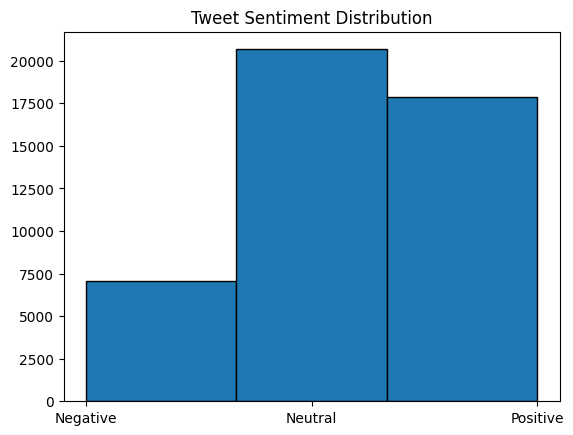

In [6]:
import matplotlib.pyplot as plt
labels = [example["label"] for example in tweet_dataset["train"]]
plt.hist(labels, bins=3, edgecolor="black")
plt.xticks([0,1,2], ["Negative", "Neutral", "Positive"])
plt.title("Tweet Sentiment Distribution")
plt.show()

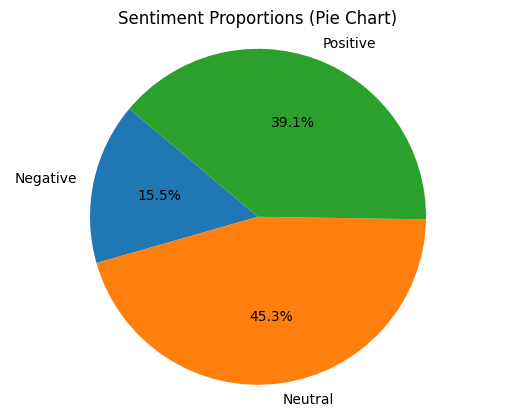

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
label_counts = Counter([ex["label"] for ex in tweet_dataset["train"]])
labels = ["Negative", "Neutral", "Positive"]
counts = [label_counts[i] for i in range(3)]

plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Proportions (Pie Chart)")
plt.axis("equal")
plt.show()

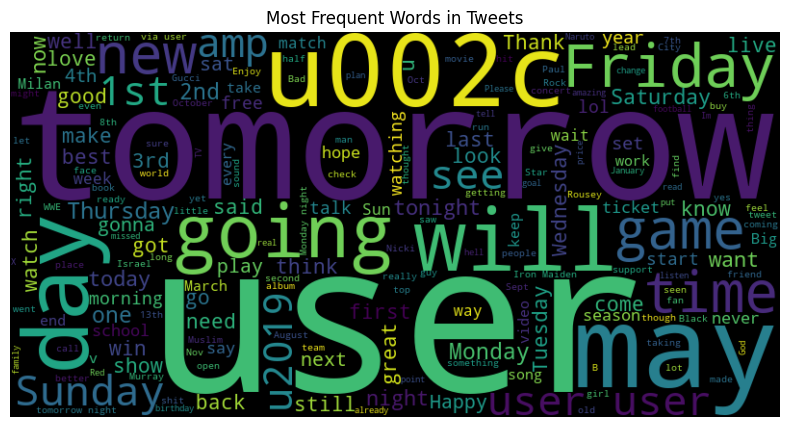

In [8]:
# A Word Cloud (a.k.a. text cloud or tag cloud) is a visual representation of text data where more frequent words appear larger and less frequent words appear smaller.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = " ".join(tweet_dataset["train"][i]["text"] for i in range(1000))
wordcloud = WordCloud(width=800, height=400).generate(all_text)
     
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()

# <span style='background :lightgreen' >6. HuggingFace Spaces</span>
## a. Exploring HuggingFace Spaces
* HiggingFace **Spaces** allow you to run or deploy ML demos directly in the browser without installing anything locally.
* Click the **Spaces** tab from the top navigation bar — this section hosts **interactive AI applications** built by the community using:
  * **Gradio** (most common — drag-and-drop UI for ML apps)
  * **Streamlit** (Python-based dashboard apps)
  * **Static HTML/JS** apps
  * **Docker** (full custom environments)
* You can explore thousands of public demos for:
  * Text generation (LLMs)
  * Image generation (Stable Diffusion, control models)
  * Audio processing (TTS, speech recognition)
  * Multimodal apps (image-to-text, RAG chatbots, agents)
  * Datasets explorers and annotation tools
* Each Space page contains:
  * **Live demo UI** — try the app instantly in your browser.
  * **App code** — located in a Git repository inside the Space.
  * **Repository structure** — supports files like:
    * `app.py` (Gradio/Streamlit)
    * `requirements.txt` / `packages.txt`
    * `README.md`
    * `Dockerfile` (for full custom runtime)
  * **Hardware settings** — CPU by default; can optionally enable GPU or upgrade hardware.
  * **Pinned models** — models the Space depends on (e.g., Llama-3.1, SDXL).
* **Run, explore, and fork Course Spaces:**
  * Course Space: **[https://huggingface.co/spaces/arif-butt](https://huggingface.co/spaces/arif-butt)**
  * Example:
    - https://huggingface.co/spaces/arif-butt/hello-spaces
    - https://huggingface.co/spaces/arif-butt/Chat-with-Arif
    - https://huggingface.co/spaces/arif-butt/NW-Traffic-Classifier
    - https://huggingface.co/spaces/arif-butt/Malware-Detector
    - https://huggingface.co/spaces/arif-butt/C-Vulnerability-Scanner

In [9]:
import os                           # Imports Python’s built-in os module so you can access environment variables (like your HF token).
from dotenv import load_dotenv      # Imports the load_dotenv function, which loads environment variables from a .env file into your Python environment.
from huggingface_hub import login   # Imports the login() function that allows you to authenticate with the Hugging Face Hub using an access token.
from huggingface_hub import HfApi  # HfApi is a high-level Python class provided by the huggingface_hub library. It allows us to programmatically interact with Hugging Face Hub, such as listing models, datasets, and Spaces.


# The following login() call is only necessary if you want to access private repos, or to use gated models or to push models/datasets
'''
load_dotenv('../keys/.env', override=True) 
hf_token = os.getenv('HF_TOKEN')
login(token=hf_token)
'''

# Create an API client object. This initializes a connection object through which we can call various methods (list_models, list_datasets, list_spaces, etc.)
# HfApi() automatically reads your Hugging Face token from environment variable (if set)
client = HfApi()

# Retrieve all Spaces for a given user using the list_spaces() method that returns a generator of SpaceInfo objects containing metadata describing a space.
spaces_gen = client.list_spaces(author="arif-butt") # The 'author' argument filters spaces to only those created by the username provided.
spaces = list(spaces_gen)                        # Convert generator → list so we can reuse it and take its length.


print("\nHugging Face Spaces for user arif-butt")
print(f"Total spaces found: {len(spaces)}\n")
for i, s in enumerate(spaces, start=1):
    print(f"\nSpace #{i}")
    print(f"  ID:        {s.id}")    # Full spaces repo name
    print(f"  SDK:       {s.sdk}")
    print(f"  Tags:      {s.tags}")


Hugging Face Spaces for user arif-butt
Total spaces found: 5


Space #1
  ID:        arif-butt/Chat-with-Arif
  SDK:       gradio
  Tags:      ['gradio', 'not-for-all-audiences', 'region:us']

Space #2
  ID:        arif-butt/C-Vulnerability-Scanner
  SDK:       gradio
  Tags:      ['gradio', 'not-for-all-audiences', 'region:us']

Space #3
  ID:        arif-butt/NW-Traffic-Classifier
  SDK:       gradio
  Tags:      ['gradio', 'not-for-all-audiences', 'region:us']

Space #4
  ID:        arif-butt/Malware-Detector
  SDK:       gradio
  Tags:      ['gradio', 'not-for-all-audiences', 'region:us']

Space #5
  ID:        arif-butt/hello-spaces
  SDK:       gradio
  Tags:      ['gradio', 'not-for-all-audiences', 'region:us']
